In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Table and Contents

1. Learn the usage of Matplotlib
2. Make some data
3. Create the model and cost function
4. Train the Model: Batch gradient descent
5. Train the Model: Stochastic gradient descent
6. Train the Model: Stochastic gradient descent with DataLoader

## 1. Learn the usage of Matplotlib

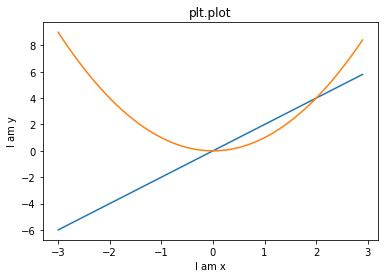

In [2]:
# plt.plot()

x = torch.arange(-3, 3, 0.1)
y1 = 2 * x
y2 = x ** 2

plt.title('plt.plot')
plt.xlabel('I am x')
plt.ylabel('I am y')

plt.plot(x.numpy(), y1.numpy())
plt.plot(x.numpy(), y2.numpy())
plt.show()

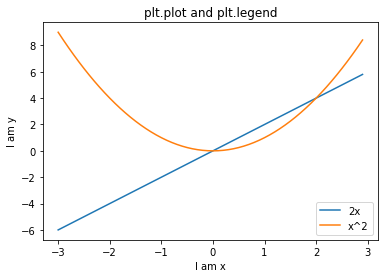

In [3]:
# plt.legend()

plt.title('plt.plot and plt.legend')
plt.xlabel('I am x')
plt.ylabel('I am y')

plt.plot(x.numpy(), y1.numpy(), label = '2x')
plt.plot(x.numpy(), y2.numpy(), label = 'x^2')
plt.legend()
plt.show()

In [4]:
# Contours 等高线


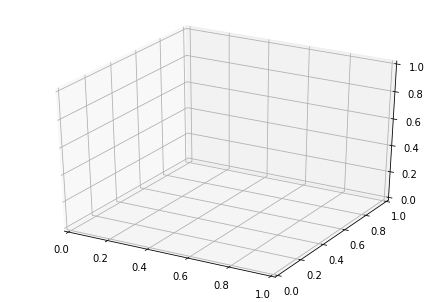

In [5]:
# 3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = Axes3D(fig)

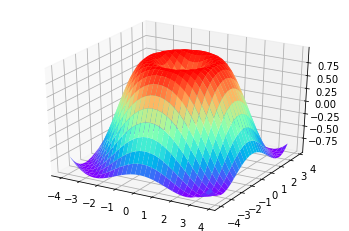

In [6]:
# x, y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)

# high value
Z = np.sin(R)

# plot
plt.axes(projection = '3d').plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
plt.show()

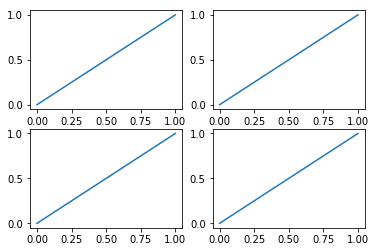

In [7]:
# subplot

plt.figure()

plt.subplot(2, 2, 1)
plt.plot([0, 1], [0, 1])

plt.subplot(2, 2, 2)
plt.plot([0, 1], [0, 1])

plt.subplot(2, 2, 3)
plt.plot([0, 1], [0, 1])

plt.subplot(2, 2, 4)
plt.plot([0, 1], [0, 1])

plt.show()

In [8]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

## 2. Make some Data

In [9]:
# Set random seed

torch.manual_seed(1)

In [10]:
# create x, y
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X -1
Y = f + 0.1 * torch.randn(X.size())

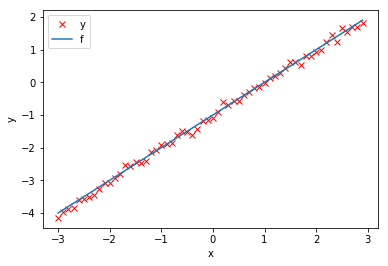

In [11]:
# Plot the result

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

## 3. Create the Model and Loss Function

In [12]:
# define forward function

def forward(x):
    return w * x + b

In [13]:
# define the MSE loss function
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

<Figure size 432x288 with 0 Axes>

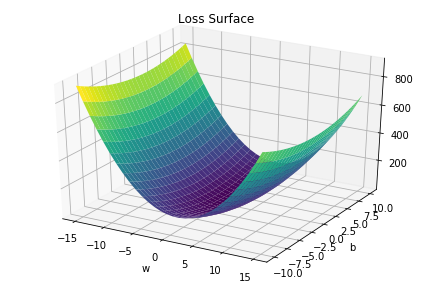

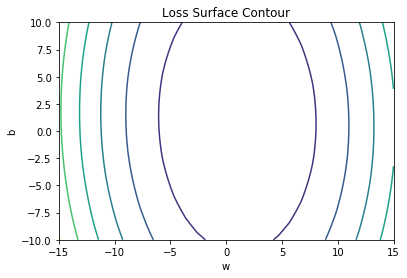

In [14]:
# Create plot_error_surfaces for view the data
get_surface = plot_error_surfaces(15, 10, X, Y, 30)

## 4. Train the Model : batch gradient descent

In [15]:
# define w and b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [16]:
# define LearnRate and a list for store LOSS

lr = 0.1
LOSS_BGD = []

In [17]:
# The function for train model

def train_model(iter):
    
    #Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss
        loss = criterion(Yhat, Y)
        
        # section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        
        # store the loss in LOSS
        LOSS_BGD.append(loss)
        
        # backward pass
        loss.backward()
        
        # update parameters w, b
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data
        
        # zero the gradient after running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

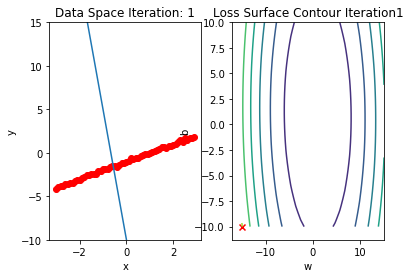

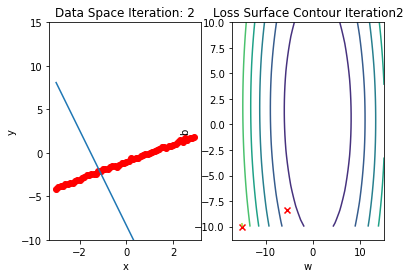

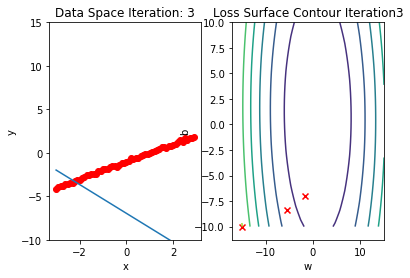

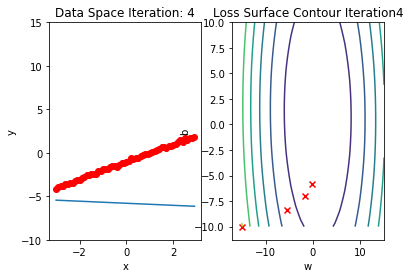

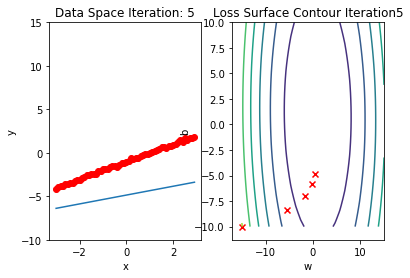

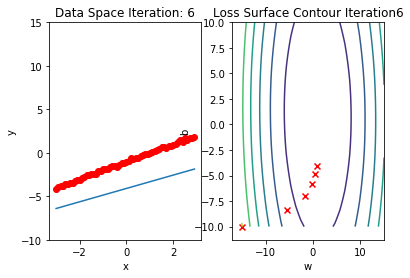

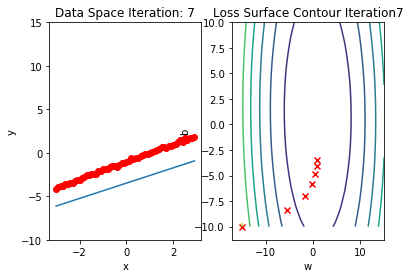

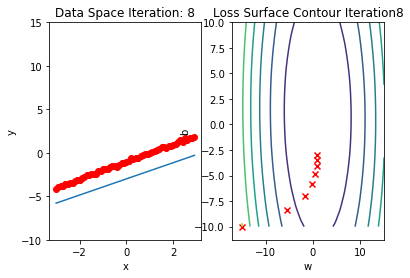

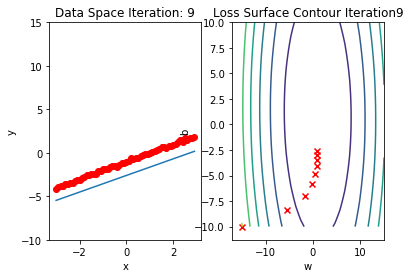

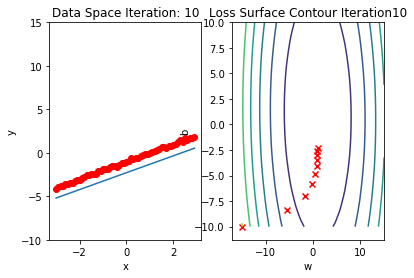

In [18]:
# Train the model with 10 iteritions
train_model(10)

## 5. Train the Model: stochastic gradient descent

In [19]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [20]:
# The function for train the model

LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):
    
    #Loop
    for epoch in range(iter):
        
        # SGD is an approximation of out true total loss/cost
        Yhat = forward(X)
        
        # store the loss
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            
            # make a prediction
            yhat = forward(x)
            
            # calculate the loss
            loss = criterion(yhat, y)
            
            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            # backward pass
            loss.backward()
            
            # update parameters w,b
            w.data -= lr * w.grad.data
            b.data -= lr * b.grad.data
            
            # zero the gradient after backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

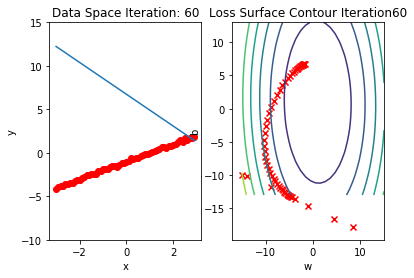

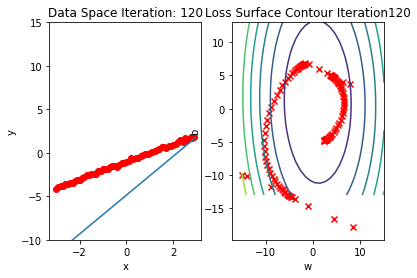

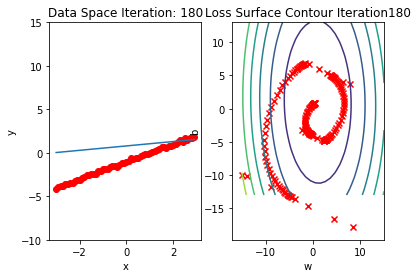

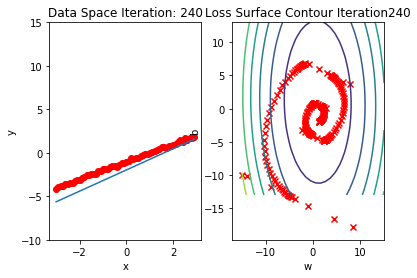

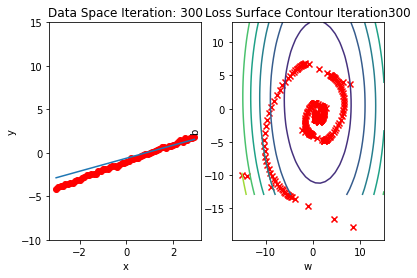

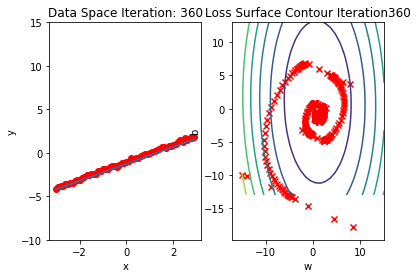

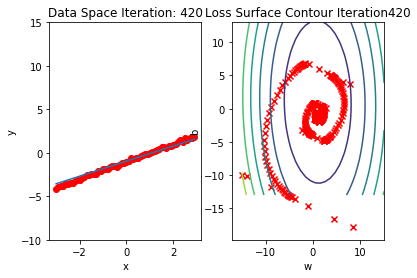

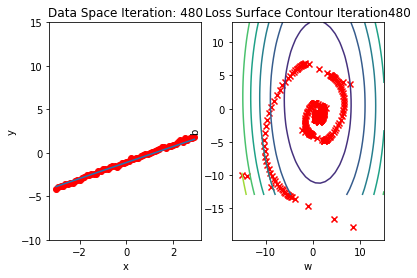

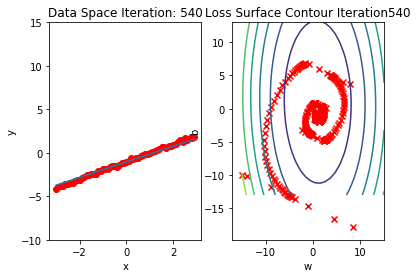

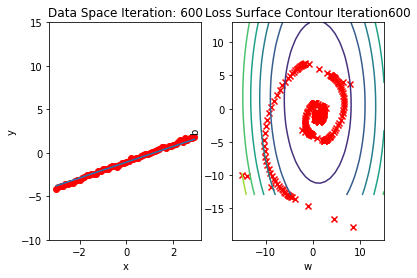

In [21]:
# Train the model with 10 iteritions

train_model_SGD(10)

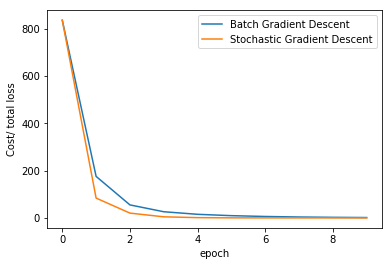

In [22]:
# Plot out the LOSS_BGD and LOSS_SGD

plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

## 6. SGD with Dataset DataLoader

In [24]:
from torch.utils.data import Dataset, DataLoader

In [25]:
# Dataset class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Return the length
    def __len__(self):
        return self.len

In [26]:
# Create the dataset and check the length

dataset = Data()
print("The length of dataset: ", len(dataset))

The length of dataset:  60


In [27]:
# print the first point

x, y = dataset[0]
print("The first point: ", x, y)

The first point:  tensor([-3.]) tensor([-4.])


In [28]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [29]:
# Create the DataLoader

trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [36]:
# The function for training the model

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_Loader = []

def train_model_DataLoader(epochs):
    
    # Loop
    for epoch in range(epochs):
        
        # SGD 
        Yhat = forward(X)
        
        # store the loss
        LOSS_Loader.append(criterion(Yhat, Y).tolist())
        
        for x, y in trainloader:
            
            # make a prediction
            yhat = forward(x)
            
            # calculate the loss
            loss = criterion(yhat, y)
            
            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            # backward pass
            loss.backward()
            
            # update parameters w,b
            w.data -= lr * w.grad.data
            b.data -= lr * b.grad.data
            
            # clear the gradient
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

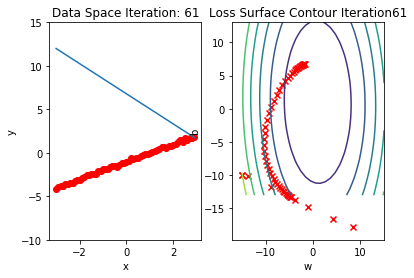

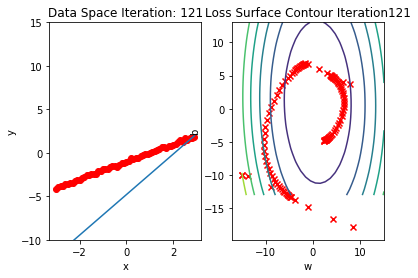

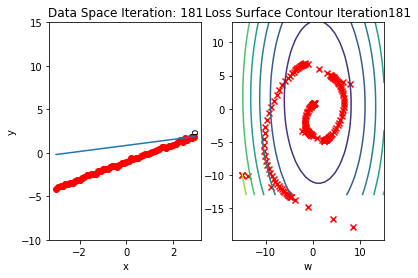

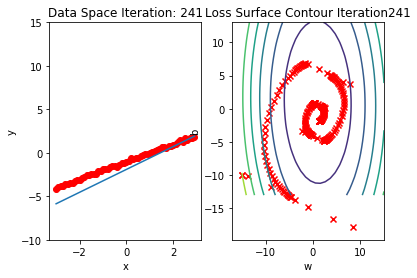

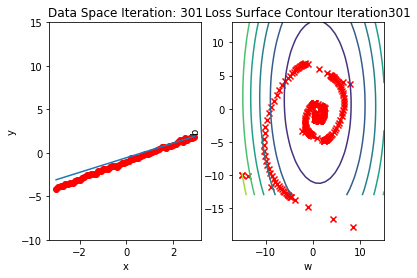

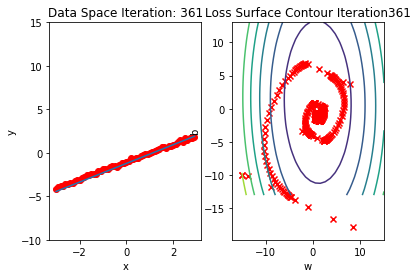

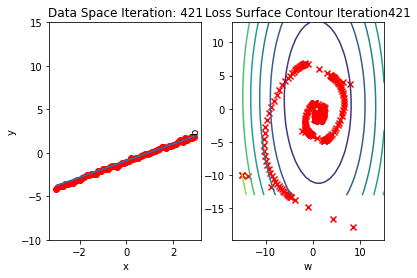

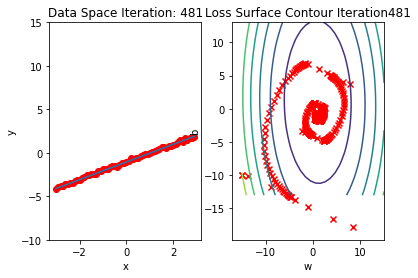

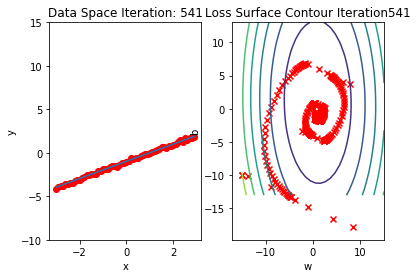

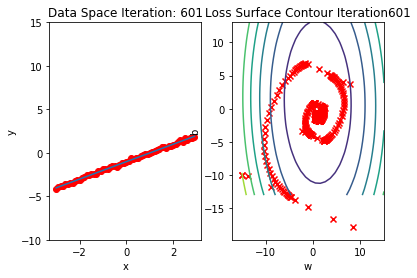

In [37]:
# Run 10 iterations

train_model_DataLoader(10)

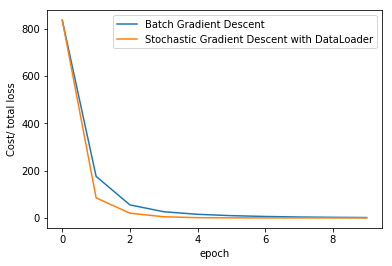

In [38]:
# Plot the LOSS_BGD and LOSS_Loader

plt.plot(LOSS_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()